In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
import os

In [2]:
"""
df = pd.read_csv('2016_visuals.csv')
df['y'] = df['y_transformed']+45
team_av_smooth, league_av_smooth = gaussian_filter(df['average_per_hour'], sigma=3), gaussian_filter(df['league_avearage'], sigma=3)
df['team_smooth_av'], df['league_smooth_av'] = team_av_smooth, league_av_smooth
df['smooth_diff'] = df['team_smooth_av'] - df['league_smooth_av']
df.head()
"""

"\ndf = pd.read_csv('2016_visuals.csv')\ndf['y'] = df['y_transformed']+45\nteam_av_smooth, league_av_smooth = gaussian_filter(df['average_per_hour'], sigma=3), gaussian_filter(df['league_avearage'], sigma=3)\ndf['team_smooth_av'], df['league_smooth_av'] = team_av_smooth, league_av_smooth\ndf['smooth_diff'] = df['team_smooth_av'] - df['league_smooth_av']\ndf.head()\n"

In [93]:
team_df = pd.read_csv('2016_team.csv')
league_df = pd.read_csv('2016_league.csv')
team_df['y'] = team_df['y_transformed']+45 #from 0 to 85
league_df['y'] = league_df['y_transformed']+45 #from 0 to 85
#team_df['average_per_hour'] = team_df['average_per_hour']*100
#league_df['average_per_hour'] = league_df['average_per_hour']*100
team_df['team_av_smooth'] = gaussian_filter(team_df['average_per_hour'], sigma=3)
league_df['league_av_smooth'] = gaussian_filter(league_df['average_per_hour'], sigma=3)

In [94]:
from PIL import Image
img = Image.open('nhl_rink.png')

In [177]:
team_df = team_df.loc[team_df['team'] == 'Arizona Coyotes']
team_rink = np.zeros((91, 86))
for i in range(0, 91): 
    for j in range(0, 86): 
        if team_df.loc[(team_df['goal_dist'] == i) & (team_df['y'] ==j), 'average_per_hour'].shape[0] != 0:
            team_rink[i][j] = np.around(team_df.loc[(team_df['goal_dist'] == i) & (team_df['y'] ==j), 'average_per_hour'].values[0],4)






In [178]:

league_rink = np.zeros((91, 86))
for i in range(0, 91): 
    for j in range(0, 86): 
        if league_df.loc[(league_df['goal_dist'] == i) & (league_df['y'] ==j), 'average_per_hour'].shape[0] != 0:
            league_rink[i][j] = np.around(league_df.loc[(league_df['goal_dist'] == i) & (league_df['y'] ==j), 'average_per_hour'].values[0],4)


In [226]:
#team_norm = (2*(team_rink - np.nanmin(team_rink))/(np.nanmax(team_rink) - np.nanmin(team_rink))) -1
#league_norm = (2*(league_rink - np.nanmin(league_rink))/(np.nanmax(league_rink) - np.nanmin(league_rink))) -1


diff = team_rink - league_rink

#diff = (2*(diff - np.nanmin(diff))/(np.nanmax(diff) - np.nanmin(diff))) -1
diff = gaussian_filter(diff, sigma=3)
#diff_norm = (2*(diff - np.nanmin(diff))/(np.nanmax(diff) - np.nanmin(diff))) -1

-0.03486198542239565 1.3572652487784633e-05


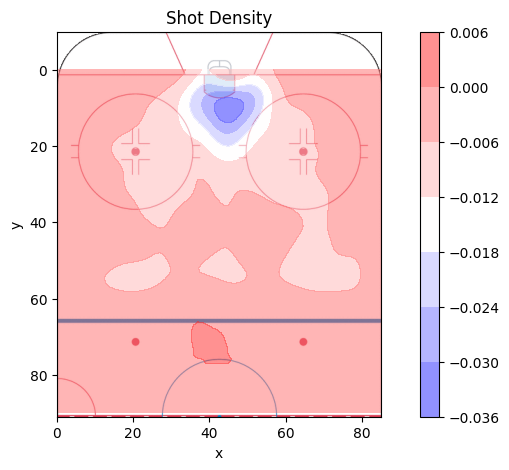

In [227]:
x, y = np.arange(86), np.arange(91)

vmin = np.min(diff)
vmax = np.max(diff)
print(vmin, vmax)


def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    plot = ax.contourf(x, y, diff, alpha = 0.5, levels=5,  cmap='bwr', origin='upper')
    ax.imshow(nimg, extent=[0,85,91,-10])
    # Step 4: Set the axis limits
    ax.set_xlim(0,85)
    fig.colorbar(plot, pad=0.05)
    
    ax.set_ylim(91,-10)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()


plot_image()

In [ ]:
[x,y] = np.round(np.meshgrid(np.linspace(0,86,86),np.linspace(0,101,101)))
team_df = team_df.loc[team_df['team'] == 'Arizona Coyotes']
#team_av = griddata((team_df['y'],team_df['goal_dist']),team_df['team_av_smooth'],(x,y),fill_value=0)
#league_av = griddata((league_df['y'],league_df['goal_dist']),league_df['league_av_smooth'],(x,y),method='cubic',fill_value=0)

print(x)
diff = team_av - league_av

diff_normalized = (2*(diff - np.nanmin(diff))/(np.nanmax(diff) - np.nanmin(diff))) -1

diff_min = np.nanmin(diff)
diff_max = np.nanmax(diff)
levels = np.arange(-1, 1, 0.1)
print(diff.shape)

In [147]:
#img transforms
print(img.size[1])
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
# nimg.show()
nimg
nimg.save("semi-nhl-rink.png", format="png")

467


In [ ]:


def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    plot = ax.contourf(x, y ,diff, alpha = 0.5, cmap='bwr', levels= levels, corner_mask=False)

    # Step 4: Set the axis limits
    ax.set_xlim(0,85)
    fig.colorbar(plot, pad=0.05)
    
    ax.set_ylim(90,-10)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()


plot_image()


In [ ]:

"""
team_pivot= team_df.pivot('goal_dist', 'y_transformed','team_av_smooth')
league_pivot = league_df.pivot('goal_dist', 'y_transformed','league_av_smooth')

X=team_pivot.columns.values
Y=team_pivot.index.values
x,y=np.meshgrid(X, Y)

team_av =team_pivot.values
league_av = league_pivot.values
diff = team_av - league_av



def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    plot = ax.contourf(x, y ,Z, origin='upper')
    ax.imshow(nimg, extent=[-42.5,42.5,90,-10])
    # Step 4: Set the axis limits
    ax.set_xlim(-42.5,42.5)
    fig.colorbar(plot)
    
    ax.set_ylim(90,-10)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()

plot_image()
"""
    

In [ ]:
img

In [ ]:
#img transforms
print(img.size[1])
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
# nimg.show()
nimg
nimg.save("semi-nhl-rink.png", format="png")

In [ ]:
# Semi rink plot
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Feet', fontweight ='bold')
ax.set_ylabel('Feet', fontweight ='bold')
ax.set_title("Result Description", fontsize = 10, fontweight ='bold')
ax.imshow(nimg, extent=[0, 80, 0, 100])#, )
# plt.plot(20,20, "ob", markersize=8)

In [ ]:
new_df = pd.DataFrame()
new_df['y_transformed'],new_df['goal_dist'], new_df['diff']  = df['y_transformed'], df['goal_dist'], df['raw_normalized']

#new_df['y_transformed'],new_df['goal_dist'] = df['y_transformed'], df['goal_dist']
def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    # Step 2: Plot the data
    sns.kdeplot(data=new_df, x='y_transformed', y='goal_dist', cmap="Reds", cbar=True, cbar_kws={'label': 'Excess Shots'})
    # Step 3: Add the image
    ax.imshow(nimg, extent=[-40,40,90,-10])
    # Step 4: Set the axis limits
    ax.set_xlim(-40,40)
    
    ax.set_ylim(90,-10)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()


plot_image()

In [ ]:
#new_df['y_transformed'],new_df['goal_dist'], new_df['diff']  = df['y_transformed'], df['goal_dist'], df['raw_normalized']
team_df = df.loc[df['team'] == 'Anaheim Ducks']

#team_df['y_transformed'] == team_df.apply(lambda x: x['y_transformed']+45)

#Z = stats.gaussian_kde(df['raw_diff'])

player_shots_smooth = gaussian_filter(xgoals_player,sigma = 3)

new_df= team_df.pivot('goal_dist', 'y','raw_normalized')
print(new_df)

X=new_df.columns.values
Y=new_df.index.values
Z=new_df.values
x,y=np.meshgrid(X, Y)




def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    plot = ax.contourf(x, y ,Z, origin='upper')
    ax.imshow(nimg, extent=[0,85,90,-10])
    # Step 4: Set the axis limits
    ax.set_xlim(0,85)
    fig.colorbar(plot)
    
    ax.set_ylim(90,-10)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()

plot_image()
    

In [ ]:
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter 
diff = griddata((team_df['y'],team_df['goal_dist']),team_df['raw_normalized'],(x,y),method='cubic',fill_value=0)
print(diff.shape)

In [ ]:
fig = plt.figure(figsize=(10,12), facecolor='w', edgecolor='k')
plt.imshow(diff,origin = 'upper')
plt.colorbar(orientation = 'horizontal', pad = 0.05)
plt.title('xGoal Array',fontdict={'fontsize': 15})
plt.show()

In [ ]:
diff_smooth = gaussian_filter(diff, sigma=2)
print(diff_smooth.min())
fig = plt.figure(figsize=(10,12), facecolor='w', edgecolor='k')
plt.imshow(diff_smooth,origin = 'upper')
plt.colorbar()
plt.title('diff Smoothed Array',fontdict={'fontsize': 15})
plt.show()

In [ ]:

#team_df['diff_smooth'] = diff_smooth
print(diff_smooth.shape)


#diff_smooth = gaussian_filter(diff, sigma=2)
new_df= team_df.pivot('goal_dist', 'y','raw_normalized')

X=new_df.columns.values
Y=new_df.index.values
Z=new_df.values
x,y=np.meshgrid(X, Y)
z_min, z_max = np.nanmin(diff_smooth), np.nanmax(diff_smooth)

def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    plot = ax.contourf(x, y ,diff_smooth, origin='upper', alpha = 1.0, cmap='bwr', 
        levels = np.linspace(z_min,z_max,12),
        vmin=z_min,
        vmax=z_max)
    ax.imshow(nimg, extent=[0,85,90,-10])
    # Step 4: Set the axis limits
    ax.set_xlim(0,85)
    fig.colorbar(plot)
    
    ax.set_ylim(90,-10)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()


plot_image()


In [ ]:
from scipy.interpolate import griddata
team_df = df.loc[df['team'] == 'Anaheim Ducks']

new_df= team_df.pivot('goal_dist', 'y','smooth_diff')

X=new_df.columns.values
Y=new_df.index.values
Z=new_df.values
x,y=np.meshgrid(X, Y)
data_min = np.nanmin(Z)
data_max = np.nanmax(Z)


diff = griddata((team_df['y'],team_df['goal_dist']),team_df['smooth_diff'],(x,y),method='cubic',fill_value=0)
fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')
ax.imshow(nimg, extent=[0,85,90,-10])
ax = ax.contourf(x,y,Z, cmap='bwr',  levels = np.linspace(-1,1, 0.5))
plt.axis('off')
#plt.title(player_name + ' vs Leage xGoal',fontdict={'fontsize': 15})
fig.colorbar(ax, orientation="horizontal",pad = 0.05)
plt.show()

